### Import potrzebnych pakietów i funkcji

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as skm
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Pobranie i przygotowanie danych

In [2]:
df = fetch_openml(data_id = 31)
y = df.target
X = df.data

In [3]:
y = pd.get_dummies(y)
y = y.drop(['bad'], axis = 1)

In [4]:
X = pd.get_dummies(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 320584)

In [6]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### Model regresji logistycznej bez regularyzacji

In [7]:
model1 = LogisticRegression(penalty = 'none', max_iter = 80000, random_state = 320584)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=80000, penalty='none', random_state=320584)

In [8]:
y_pred_train = model1.predict(X_train)

In [9]:
print("dokładność na zbiorze treningowym:", np.round(accuracy_score(y_train, y_pred_train), 3))
print("czułość na zbiorze treningowym:", np.round(recall_score(y_train, y_pred_train), 3))
print("precyzja na zbiorze treningowym:", np.round(precision_score(y_train, y_pred_train), 3))

dokładność na zbiorze treningowym: 0.786
czułość na zbiorze treningowym: 0.891
precyzja na zbiorze treningowym: 0.817


In [10]:
pred_train = model1.predict_proba(X_train)
print("AUC na zbiorze treningowym:", np.round(roc_auc_score(y_train, pred_train[:, 1]), 3))

AUC na zbiorze treningowym: 0.838


In [11]:
y_pred_test = model1.predict(X_test)

In [12]:
print("dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred_test), 3))
print("czułość na zbiorze testowym:", np.round(recall_score(y_test, y_pred_test), 3))
print("precyzja na zbiorze testowym:", np.round(precision_score(y_test, y_pred_test), 3))

dokładność na zbiorze testowym: 0.723
czułość na zbiorze testowym: 0.794
precyzja na zbiorze testowym: 0.813


In [13]:
pred_test = model1.predict_proba(X_test)
print("AUC na zbiorze testowym:", np.round(roc_auc_score(y_test, pred_test[:, 1]), 3))

AUC na zbiorze testowym: 0.774


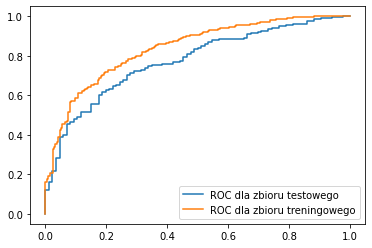

In [14]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test[:, 1])
plt.plot(fpr2, tpr2, label = "ROC dla zbioru testowego")
plt.plot(fpr1, tpr1, label = "ROC dla zbioru treningowego")
plt.legend()
plt.savefig('bezregularyzacji.pdf', format = "pdf")

### Model regresji logistycznej z regularyzacją L1

In [15]:
model2 = LogisticRegression(penalty = 'l1', max_iter = 80000, random_state = 320584, solver = 'liblinear')
model2.fit(X_train, y_train)

LogisticRegression(max_iter=80000, penalty='l1', random_state=320584,
                   solver='liblinear')

In [16]:
kfold = skm.KFold(5, random_state = 320584, shuffle = True)

In [17]:
grid = skm.GridSearchCV(model2, {'C': [0.001,0.005, 0.01, 0.05, 0.1, 0.5, 0.8, 0.99, 1, 1.02, 2, 5, 10,30,  50, 100]},
                       refit = True, cv = kfold, scoring = 'precision')

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=320584, shuffle=True),
             estimator=LogisticRegression(max_iter=80000, penalty='l1',
                                          random_state=320584,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8, 0.99, 1,
                               1.02, 2, 5, 10, 30, 50, 100]},
             scoring='precision')

In [19]:
grid.best_params_

{'C': 0.99}

In [20]:
model2best = LogisticRegression(penalty = 'l1', max_iter = 80000, random_state = 320584, solver = 'liblinear', C = 0.99)
model2best.fit(X_train, y_train)

LogisticRegression(C=0.99, max_iter=80000, penalty='l1', random_state=320584,
                   solver='liblinear')

In [21]:
y_pred_train_l1 = model2best.predict(X_train)

In [22]:
print("dokładność na zbiorze treningowym:", np.round(accuracy_score(y_train, y_pred_train_l1), 3))
print("czułość na zbiorze treningowym:", np.round(recall_score(y_train, y_pred_train_l1), 3))
print("precyzja na zbiorze treningowym:", np.round(precision_score(y_train, y_pred_train_l1), 3))

dokładność na zbiorze treningowym: 0.783
czułość na zbiorze treningowym: 0.891
precyzja na zbiorze treningowym: 0.814


In [23]:
pred_train_l1 = model2best.predict_proba(X_train)
print("AUC na zbiorze treningowym:", np.round(roc_auc_score(y_train, pred_train_l1[:, 1]), 3))

AUC na zbiorze treningowym: 0.843


In [24]:
y_pred_test_l1 = model2best.predict(X_test)

In [25]:
print("dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred_test_l1), 3))
print("czułość na zbiorze testowym:", np.round(recall_score(y_test, y_pred_test_l1), 3))
print("precyzja na zbiorze testowym:", np.round(precision_score(y_test, y_pred_test_l1), 3))

dokładność na zbiorze testowym: 0.74
czułość na zbiorze testowym: 0.822
precyzja na zbiorze testowym: 0.815


In [26]:
pred_test_l1 = model2best.predict_proba(X_test)
print("AUC na zbiorze testowym:", np.round(roc_auc_score(y_test, pred_test_l1[:, 1]), 3))

AUC na zbiorze testowym: 0.781


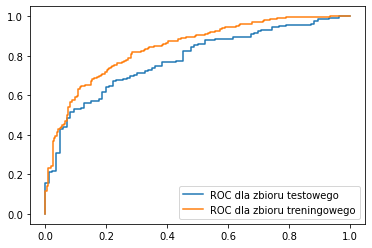

In [27]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train_l1[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test_l1[:, 1])
plt.plot(fpr2, tpr2, label = "ROC dla zbioru testowego")
plt.plot(fpr1, tpr1, label = "ROC dla zbioru treningowego")
plt.legend()
plt.savefig('regularyzacjal1.pdf', format = "pdf")

### Model regresji logistycznej z regularyzacją L2

In [28]:
model3 = LogisticRegression(penalty = 'l2', max_iter = 80000, random_state = 320584)
model3.fit(X_train, y_train)

LogisticRegression(max_iter=80000, random_state=320584)

In [29]:
kfold = skm.KFold(5, random_state = 320584, shuffle = True)

In [30]:
grid = skm.GridSearchCV(model3, {'C': [0.001,0.005, 0.01, 0.05, 0.1, 0.5, 0.8, 0.99, 1, 1.02, 2, 5, 10, 50, 100]},
                       refit = True, cv = kfold, scoring = 'precision')

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=320584, shuffle=True),
             estimator=LogisticRegression(max_iter=80000, random_state=320584),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8, 0.99, 1,
                               1.02, 2, 5, 10, 50, 100]},
             scoring='precision')

In [32]:
grid.best_params_

{'C': 0.5}

In [33]:
model3best = LogisticRegression(penalty = 'l2', max_iter = 80000, random_state = 320584, C = 0.5)
model3best.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=80000, random_state=320584)

In [34]:
y_pred_train_l2 = model3best.predict(X_train)

In [35]:
print("dokładność na zbiorze treningowym:", np.round(accuracy_score(y_train, y_pred_train_l2), 3))
print("czułość na zbiorze treningowym:", np.round(recall_score(y_train, y_pred_train_l2), 3))
print("precyzja na zbiorze treningowym:", np.round(precision_score(y_train, y_pred_train_l2), 3))

dokładność na zbiorze treningowym: 0.79
czułość na zbiorze treningowym: 0.899
precyzja na zbiorze treningowym: 0.817


In [36]:
pred_train_l2 = model3best.predict_proba(X_train)
print("AUC na zbiorze treningowym:", np.round(roc_auc_score(y_train, pred_train_l2[:, 1]), 3))

AUC na zbiorze treningowym: 0.838


In [37]:
y_pred_test_l2 = model3best.predict(X_test)

In [38]:
print("dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred_test_l2), 3))
print("czułość na zbiorze testowym:", np.round(recall_score(y_test, y_pred_test_l2), 3))
print("precyzja na zbiorze testowym:", np.round(precision_score(y_test, y_pred_test_l2), 3))

dokładność na zbiorze testowym: 0.727
czułość na zbiorze testowym: 0.808
precyzja na zbiorze testowym: 0.808


In [39]:
pred_test_l2 = model3best.predict_proba(X_test)
print("AUC na zbiorze testowym:", np.round(roc_auc_score(y_test, pred_test_l2[:, 1]), 3))

AUC na zbiorze testowym: 0.779


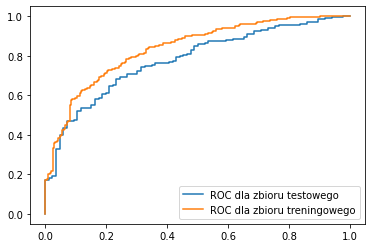

In [40]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train_l2[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test_l2[:, 1])
plt.plot(fpr2, tpr2, label = "ROC dla zbioru testowego")
plt.plot(fpr1, tpr1, label = "ROC dla zbioru treningowego")
plt.legend()
plt.savefig('regularyzacjal2.pdf', format = "pdf")

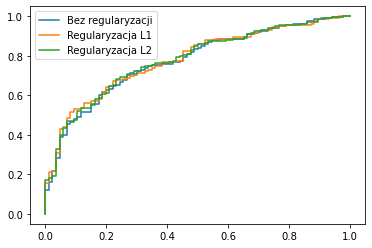

In [41]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test_l1[:, 1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_test_l2[:, 1])
plt.plot(fpr1, tpr1, label = "Bez regularyzacji")
plt.plot(fpr2, tpr2, label = "Regularyzacja L1")
plt.plot(fpr3, tpr3, label = "Regularyzacja L2")
plt.legend()
plt.savefig('wszystkie.pdf', format = "pdf")

### Współczynniki w modelach

In [42]:
print("współczynniki w modelu bez regularyzacji:", model1.coef_)

współczynniki w modelu bez regularyzacji: [[-3.07128282e-02 -1.04717536e-04 -3.01272415e-01  1.49563069e-01
   2.94995025e-03  4.73217445e-02  6.41806526e-02 -5.98923819e-01
  -2.08018365e-01  1.08021842e-01  1.13429780e+00 -5.78186280e-01
  -4.16762949e-01  3.76237182e-01 -5.33605149e-02  1.10745002e+00
  -8.73393728e-01  1.14413649e+00  1.28308220e-01  5.25024591e-01
  -6.17015203e-02 -3.55069517e-01 -3.23261215e-01  0.00000000e+00
   3.56131008e-03 -5.80627601e-02  3.05835592e-01 -4.17088052e-01
  -2.29442847e-01  1.73714782e-02  4.72375343e-01  5.92161537e-01
   5.00929121e-03  1.21171499e-01 -2.77893203e-01  6.74511470e-01
  -8.74215973e-02 -1.56120744e-01 -1.30522138e-01  6.31859825e-01
   9.01605157e-02  0.00000000e+00 -2.90946038e-01 -2.51484007e-02
   7.51471898e-01  4.43015485e-01  6.05498339e-02  9.90321531e-02
  -1.67220012e-01 -8.18567839e-02 -1.42502690e-01  6.59736933e-01
  -3.07738142e-01  5.26050395e-01  2.17065207e-01  3.40235834e-01
  -4.67145004e-02 -1.03288918e-01 

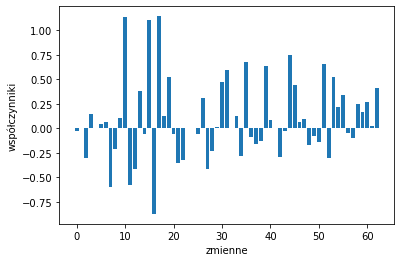

In [43]:
plt.bar(range(len(model1.coef_[0])), model1.coef_[0])
plt.xlabel("zmienne")
plt.ylabel("współczynniki")
plt.show()

In [44]:
niepotrzebne_indeksy1 = [index for index, value in enumerate(model1.coef_[0]) if value == 0]
for i in niepotrzebne_indeksy1:
    print(X.columns[i])

purpose_vacation
personal_status_female single


In [45]:
print("współczynniki w modelu z regularyzacją L1:", model2best.coef_)

współczynniki w modelu z regularyzacją L1: [[-3.12180622e-02 -8.49830274e-05 -2.23539840e-01  1.31866919e-01
   6.25700688e-03 -2.63690273e-02 -2.32269138e-02 -4.17052172e-01
   0.00000000e+00  2.54498590e-01  1.28752610e+00 -5.42279332e-01
  -3.27373610e-01  2.68282662e-01  2.83800070e-03  8.91139604e-01
  -6.50868837e-01  1.16326400e+00  0.00000000e+00  4.56706663e-01
   0.00000000e+00 -5.07099171e-01 -2.22947589e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.87163816e-01 -2.99547990e-01
   0.00000000e+00  0.00000000e+00  8.66557239e-01  5.53472469e-01
   0.00000000e+00  9.61599067e-02 -9.52651850e-02  5.90442947e-01
   0.00000000e+00  0.00000000e+00 -2.26242104e-02  5.71904789e-01
   6.04589553e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.02300463e+00  2.88563384e-01  0.00000000e+00  1.00947847e-01
  -1.87164569e-01  0.00000000e+00  0.00000000e+00  7.16557419e-01
  -3.67752141e-01  3.00202332e-01  1.15824259e-02  6.52935187e-01
   0.00000000e+00  0.00000000e+00

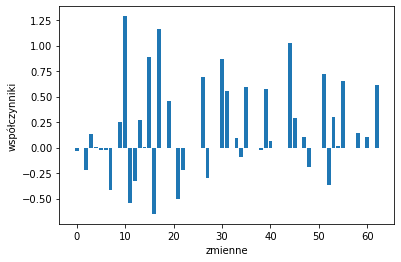

In [46]:
plt.bar(range(len(model2best.coef_[0])), model2best.coef_[0])
plt.xlabel("zmienne")
plt.ylabel("współczynniki")
plt.show()

In [47]:
niepotrzebne_indeksy2 = [index for index, value in enumerate(model2best.coef_[0]) if value == 0]
for i in niepotrzebne_indeksy2:
    print(X.columns[i])

checking_status_0<=X<200
purpose_furniture/equipment
purpose_domestic appliance
purpose_vacation
purpose_retraining
purpose_business
savings_status_100<=X<500
savings_status_500<=X<1000
employment_unemployed
employment_>=7
personal_status_male div/sep
personal_status_female single
other_parties_none
other_parties_co applicant
property_magnitude_life insurance
other_payment_plans_bank
other_payment_plans_stores
job_unskilled resident
job_skilled
own_telephone_none
foreign_worker_yes


In [48]:
print("współczynniki w modelu z regularyzacją L2:", model3best.coef_)

współczynniki w modelu z regularyzacją L2: [[-3.03600137e-02 -8.78633664e-05 -2.54662591e-01  1.34399604e-01
   5.34030352e-03  5.53501588e-02  5.33485829e-02 -5.79751239e-01
  -1.80829886e-01  9.57998051e-02  1.02335747e+00 -4.79017172e-01
  -3.56921339e-01  3.04686051e-01 -4.22432011e-02  9.32071811e-01
  -7.25404614e-01  9.34241824e-01  8.73262351e-02  4.65487234e-01
  -5.35969282e-02 -2.90027597e-01 -2.67382125e-01  0.00000000e+00
   3.86731020e-03 -4.14501683e-02  2.45514979e-01 -3.86322270e-01
  -1.77299067e-01  3.17648433e-02  3.89405035e-01  5.01027608e-01
  -1.15871860e-02  7.86847146e-02 -2.23024389e-01  5.65094247e-01
  -5.05912371e-02 -1.32902270e-01 -1.27967142e-01  5.33801366e-01
   8.56441955e-02  0.00000000e+00 -2.23545737e-01 -2.85163336e-02
   6.10638220e-01  3.80402796e-01  3.64095830e-02  1.03110346e-01
  -1.61346575e-01 -9.93531996e-02 -1.18381218e-01  5.76310567e-01
  -2.69263673e-01  4.70901625e-01  1.56938198e-01  2.73781001e-01
  -3.52961270e-02 -7.05249042e-02

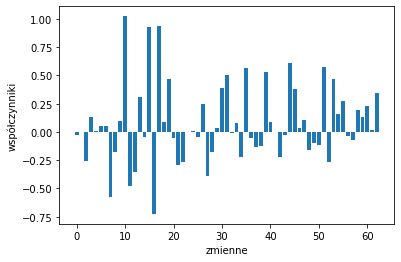

In [49]:
plt.bar(range(len(model3best.coef_[0])), model3best.coef_[0])
plt.xlabel("zmienne")
plt.ylabel("współczynniki")
plt.show()

In [50]:
niepotrzebne_indeksy3 = [index for index, value in enumerate(model3best.coef_[0]) if value == 0]
for i in niepotrzebne_indeksy3:
    print(X.columns[i])

purpose_vacation
personal_status_female single


### Model wektorów podpierających

In [68]:
X_train2 = X_train.drop(X_train.columns[niepotrzebne_indeksy2], axis = 1)
X_test2 = X_test.drop(X_train.columns[niepotrzebne_indeksy2], axis = 1)

In [69]:
svm = SVC(kernel = 'linear', random_state = 320584)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=320584)

In [70]:
y_pred_train = svm.predict(X_train)

In [71]:
print("dokładność na zbiorze treningowym:", np.round(accuracy_score(y_train, y_pred_train), 3))
print("czułość na zbiorze treningowym:", np.round(recall_score(y_train, y_pred_train), 3))
print("precyzja na zbiorze treningowym:", np.round(precision_score(y_train, y_pred_train), 3))

dokładność na zbiorze treningowym: 0.78
czułość na zbiorze treningowym: 0.852
precyzja na zbiorze treningowym: 0.835


In [72]:
pred_train = svm.decision_function(X_train)
print("AUC na zbiorze treningowym:", np.round(roc_auc_score(y_train, pred_train), 3))

AUC na zbiorze treningowym: 0.817


In [73]:
y_pred_test = svm.predict(X_test)

In [74]:
print("dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred_test), 3))
print("czułość na zbiorze testowym:", np.round(recall_score(y_test, y_pred_test), 3))
print("precyzja na zbiorze testowym:", np.round(precision_score(y_test, y_pred_test), 3))

dokładność na zbiorze testowym: 0.733
czułość na zbiorze testowym: 0.762
precyzja na zbiorze testowym: 0.849


In [75]:
pred_test = svm.decision_function(X_test)
print("AUC na zbiorze testowym:", np.round(roc_auc_score(y_test, pred_test), 3))

AUC na zbiorze testowym: 0.771


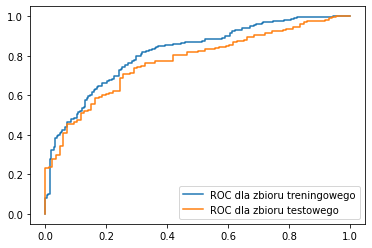

In [76]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
plt.plot(fpr1, tpr1, label = "ROC dla zbioru treningowego")
plt.plot(fpr2, tpr2, label = "ROC dla zbioru testowego")
plt.legend()
plt.savefig('svm.pdf', format = "pdf")